# Calculating the Accuracy of the Model

Using the same dataset, expand the model by including all other features into the regression. 

Moreover, calculate the accuracy of the model and create a confusion matrix

## Import the relevant libraries

In [122]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [123]:
raw_data = pd.read_csv('13.1 Bank_data.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [124]:
data_cleaned = raw_data.drop(['Unnamed: 0'], axis=1)
data_cleaned['y'] = data_cleaned['y'].map({'yes': 1, 'no': 0})
data = data_cleaned

In [125]:
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [126]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [127]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
result_log = reg_log.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Feb 2022   Pseudo R-squ.:                  0.2121
Time:                        00:12:33   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

Text(0, 0.5, 'y')

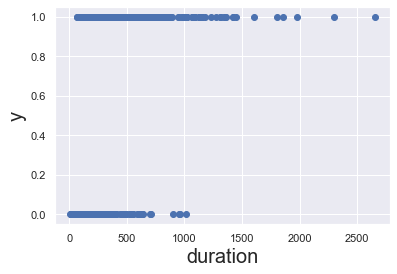

In [128]:
plt.scatter(x1, y)
plt.xlabel('duration', fontsize=20)
plt.ylabel('y', fontsize=20)


## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [129]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


In [130]:
y = data['y']
x1 = data[['interest_rate','credit','march','duration']]
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
result_log = reg_log.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.347794
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      513
Method:                           MLE   Df Model:                            4
Date:                Wed, 16 Feb 2022   Pseudo R-squ.:                  0.4982
Time:                        00:12:34   Log-Likelihood:                -180.16
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 3.654e-76
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3797      0.288      1.319      0.187      -0.185       0.944
interest_rate    -0.8902      0.087    -10.198      0.000      -1.061      -0.719
credit            2.2200      1.075      2.065      0.039       0.113       4.327
march            -1.8356      0.319     -5.757      0.000      -2.461      -1.211
duration          0.0070      0.001      9.428      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Create the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [131]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [132]:
confusion_matrix(x, y, result_log)

(array([[217.,  42.],
        [ 29., 230.]]),
 0.862934362934363)

## Testing

In [133]:
dataset_test = pd.read_csv('16.2 Bank_data_testing.csv')
dataset_test.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


In [134]:
dataset_test_cleaned = dataset_test.drop(['Unnamed: 0'], axis=1)
dataset_test_cleaned = dataset_test_cleaned.drop(['may'], axis=1)
dataset_test_cleaned['y'] = dataset_test_cleaned['y'].map({'yes': 1, 'no': 0})
dataset_test_cleaned.head()

,interest_rate,credit,march,previous,duration,y
0,1.313,0.0,1.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,36.0,0


In [135]:
data_actual = dataset_test_cleaned['y']
data_test = dataset_test_cleaned[['interest_rate','credit','march','duration']]
data_test.describe()

,interest_rate,credit,march,duration
count,222.000000,222.000000,222.000000,222.000000
mean,2.922095,0.031532,0.274775,398.860360
std,1.891766,0.175144,0.447410,410.565798
min,0.639000,0.000000,0.000000,6.000000
25%,1.049250,0.000000,0.000000,144.750000
50%,1.714000,0.000000,0.000000,255.500000
75%,4.960000,0.000000,1.000000,525.250000
max,4.968000,1.000000,1.000000,3643.000000


In [136]:
x = sm.add_constant(data_test)
reg_log = sm.Logit(data_actual, x)
result_log = reg_log.fit()
cm = confusion_matrix(x, data_actual, result_log)
cm

         Current function value: 0.333313
         Iterations: 35


C:\Users\ShayanJul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(array([[ 92.,  19.],
        [  9., 102.]]),
 0.8738738738738738)